In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from utils import missing_values_table, fix_outlier, convert_bytes_to_megabytes, convert_ms_to_seconds


### calling load_data_from_postgres function 

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))

from load_data import load_data_from_postgres

In [3]:
query = "SELECT * FROM xdr_data"

In [4]:
df_postgres = load_data_from_postgres(query)
print("Data loaded using psycopg2:")

Data loaded using psycopg2:


In [5]:
df_postgres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

### Extracting columns that are needed for user overview analysis

In [6]:
# List of relevant columns for user overview analysiss
user_overview_columns = [
    'IMSI', 'MSISDN/Number', 'IMEI', 'Handset Manufacturer', 'Handset Type',
    'Dur. (ms)', 'Start', 'End', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
    'Total DL (Bytes)', 'Total UL (Bytes)',
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)',
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'
]

In [7]:
# Create the df_user_overview DataFrame with the selected columns
df_user_overview = df_postgres[user_overview_columns].copy()

### EDA on the extracted data


In [8]:
df_user_overview.head()

,IMSI,MSISDN/Number,IMEI,Handset Manufacturer,Handset Type,Dur. (ms),Start,End,Activity Duration DL (ms),Activity Duration UL (ms),...,Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,2.082014e+14,3.366496e+10,3.552121e+13,Samsung,Samsung Galaxy A5 Sm-A520F,1823652.0,4/4/2019 12:01,4/25/2019 14:35,37624.0,38787.0,...,3563542.0,137762.0,278082303.0,14344150.0,171744450.0,8814393.0,42.0,5.0,23.0,44.0
1,2.082019e+14,3.368185e+10,3.579401e+13,Samsung,Samsung Galaxy J5 (Sm-J530),1365104.0,4/9/2019 13:04,4/25/2019 8:15,168.0,3560.0,...,629046.0,308339.0,608750074.0,1170709.0,526904238.0,15055145.0,65.0,5.0,16.0,26.0
2,2.082003e+14,3.376063e+10,3.528151e+13,Samsung,Samsung Galaxy A8 (2018),1361762.0,4/9/2019 17:42,4/25/2019 11:58,0.0,0.0,...,2690151.0,672973.0,229584621.0,395630.0,410692588.0,4215763.0,NaN,NaN,6.0,9.0
3,2.082014e+14,3.375034e+10,3.535661e+13,undefined,undefined,1321509.0,4/10/2019 0:31,4/25/2019 7:36,3330.0,37882.0,...,1439754.0,631229.0,799538153.0,10849722.0,749039933.0,12797283.0,NaN,NaN,44.0,44.0
4,2.082014e+14,3.369980e+10,3.540701e+13,Samsung,Samsung Sm-G390F,1089009.0,4/12/2019 20:10,4/25/2019 10:40,0.0,0.0,...,1936496.0,173853.0,527707248.0,3529801.0,550709500.0,13910322.0,NaN,NaN,6.0,9.0


In [9]:
df_user_overview.shape

(150001, 30)

### checking for missing values using imported function missing_values_table

In [10]:
missing_values_table(df_user_overview)


Your selected dataframe has 30 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
Avg RTT DL (ms),27829,18.6
Avg RTT UL (ms),27812,18.5
MSISDN/Number,1066,0.7
IMEI,572,0.4
Handset Manufacturer,572,0.4
Handset Type,572,0.4
IMSI,570,0.4
Dur. (ms),1,0.0
Start,1,0.0
End,1,0.0


## cleaning the data by using different techniques 

In [11]:
df_user_overview.dropna(subset=['MSISDN/Number'], inplace=True)
missing_values_table(df_user_overview)


Your selected dataframe has 30 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Avg RTT DL (ms),27644,18.6
Avg RTT UL (ms),27625,18.5


### Filling the missing Values of the above fields with the mean of the respective columns

In [12]:
# Calculate mean values
mean_rtt_dl = df_user_overview['Avg RTT DL (ms)'].mean()
mean_rtt_ul = df_user_overview['Avg RTT UL (ms)'].mean()

# Fill missing values with mean
df_user_overview['Avg RTT DL (ms)'].fillna(mean_rtt_dl, inplace=True)
df_user_overview['Avg RTT UL (ms)'].fillna(mean_rtt_ul, inplace=True)

## fixing outliers 

In [13]:
# List of relevant columns to apply quartiles(0.95) to fix outliers
user_overview_columns_to_apply_quartiles = [
    'Dur. (ms)',  'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
    'Total DL (Bytes)', 'Total UL (Bytes)',
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)',
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'
]

In [14]:
# Apply the fix_outlier function to each specified column
for column in user_overview_columns_to_apply_quartiles:
    if column in df_user_overview.columns:
        df_user_overview = fix_outlier(df_user_overview, column)

In [15]:
df_user_overview.isnull().sum()

IMSI                         0
MSISDN/Number                0
IMEI                         0
Handset Manufacturer         0
Handset Type                 0
Dur. (ms)                    0
Start                        0
End                          0
Activity Duration DL (ms)    0
Activity Duration UL (ms)    0
Total DL (Bytes)             0
Total UL (Bytes)             0
Social Media DL (Bytes)      0
Social Media UL (Bytes)      0
Youtube DL (Bytes)           0
Youtube UL (Bytes)           0
Netflix DL (Bytes)           0
Netflix UL (Bytes)           0
Google DL (Bytes)            0
Google UL (Bytes)            0
Email DL (Bytes)             0
Email UL (Bytes)             0
Gaming DL (Bytes)            0
Gaming UL (Bytes)            0
Other DL (Bytes)             0
Other UL (Bytes)             0
Avg RTT DL (ms)              0
Avg RTT UL (ms)              0
Avg Bearer TP DL (kbps)      0
Avg Bearer TP UL (kbps)      0
dtype: int64

## Formatting the data

### Byte to Megabyte conversion

In [ ]:
byte_columns = [
    'Total DL (Bytes)', 'Total UL (Bytes)',
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'YouTube DL (Bytes)', 'YouTube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

In [30]:
for column in byte_columns:
    if column in df_user_overview.columns:
        df_user_overview[column] = df_user_overview[column].apply(convert_bytes_to_megabytes)

### converting milliseconds to seconds

In [31]:
millisecond_columns = [
    'Dur. (ms)',
    'Activity Duration DL (ms)',
    'Activity Duration UL (ms)',
    'Avg RTT DL (ms)',
    'Avg RTT UL (ms)'
]

In [32]:
for column in millisecond_columns:
    if column in df_user_overview.columns:
        df_user_overview[column] = df_user_overview[column].apply(convert_ms_to_seconds)

### renaming the columns

In [33]:
df_user_overview.rename(columns=lambda x: x.replace('Bytes', 'Megabytes') if 'Bytes' in x else x, inplace=True)
df_user_overview.rename(columns=lambda x: x.replace('(ms)', '(s)') if '(ms)' in x else x, inplace=True)

In [34]:
df_user_overview.head()

,IMSI,MSISDN/Number,IMEI,Handset Manufacturer,Handset Type,Dur. (s),Start,End,Activity Duration DL (s),Activity Duration UL (s),...,Email DL (Megabytes),Email UL (Megabytes),Gaming DL (Megabytes),Gaming UL (Megabytes),Other DL (Megabytes),Other UL (Megabytes),Avg RTT DL (s),Avg RTT UL (s),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,2.082014e+14,3.366496e+10,3.552121e+13,Samsung,Samsung Galaxy A5 Sm-A520F,241.7635,4/4/2019 12:01,4/25/2019 14:35,37.6240,38.7870,...,3.248914,0.131380,265.199950,13.679647,163.788271,8.406060,0.042000,0.005000,23.0,44.0
1,2.082019e+14,3.368185e+10,3.579401e+13,Samsung,Samsung Galaxy J5 (Sm-J530),241.7635,4/9/2019 13:04,4/25/2019 8:15,0.1680,3.5600,...,0.599905,0.294055,580.549311,1.116475,502.495039,14.357705,0.065000,0.005000,16.0,26.0
2,2.082003e+14,3.376063e+10,3.528151e+13,Samsung,Samsung Galaxy A8 (2018),241.7635,4/9/2019 17:42,4/25/2019 11:58,0.1027,0.5897,...,2.565528,0.641797,218.948956,0.794487,391.666973,4.020465,0.108225,0.017637,11.0,18.0
3,2.082014e+14,3.375034e+10,3.535661e+13,undefined,undefined,241.7635,4/10/2019 0:31,4/25/2019 7:36,3.3300,37.8820,...,1.373056,0.601987,762.499002,10.347101,714.340146,12.204440,0.108225,0.017637,44.0,44.0
4,2.082014e+14,3.369980e+10,3.540701e+13,Samsung,Samsung Sm-G390F,241.7635,4/12/2019 20:10,4/25/2019 10:40,0.1027,0.5897,...,1.846786,0.165799,503.260849,3.366281,525.197506,13.265917,0.108225,0.017637,11.0,18.0


### Visualizing the data

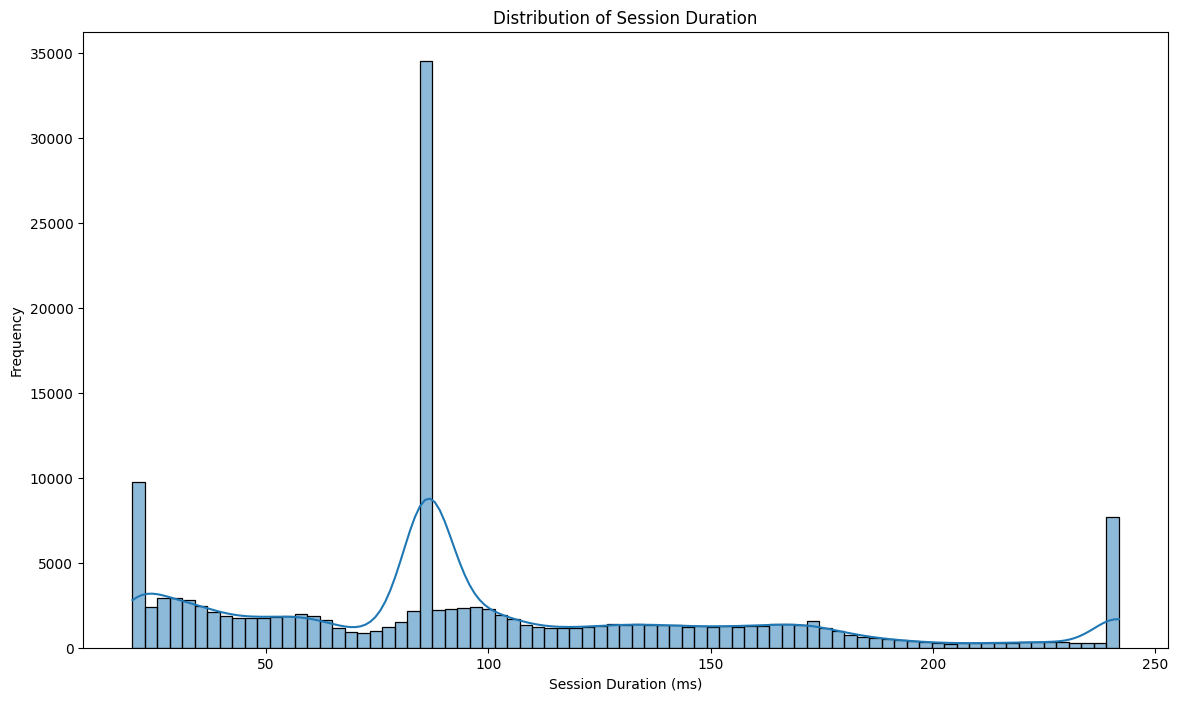

In [36]:
# Set up the figure
plt.figure(figsize=(14, 8))

# Histogram for session duration
sns.histplot(df_user_overview['Dur. (s)'], kde=True)
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Frequency')
plt.show()


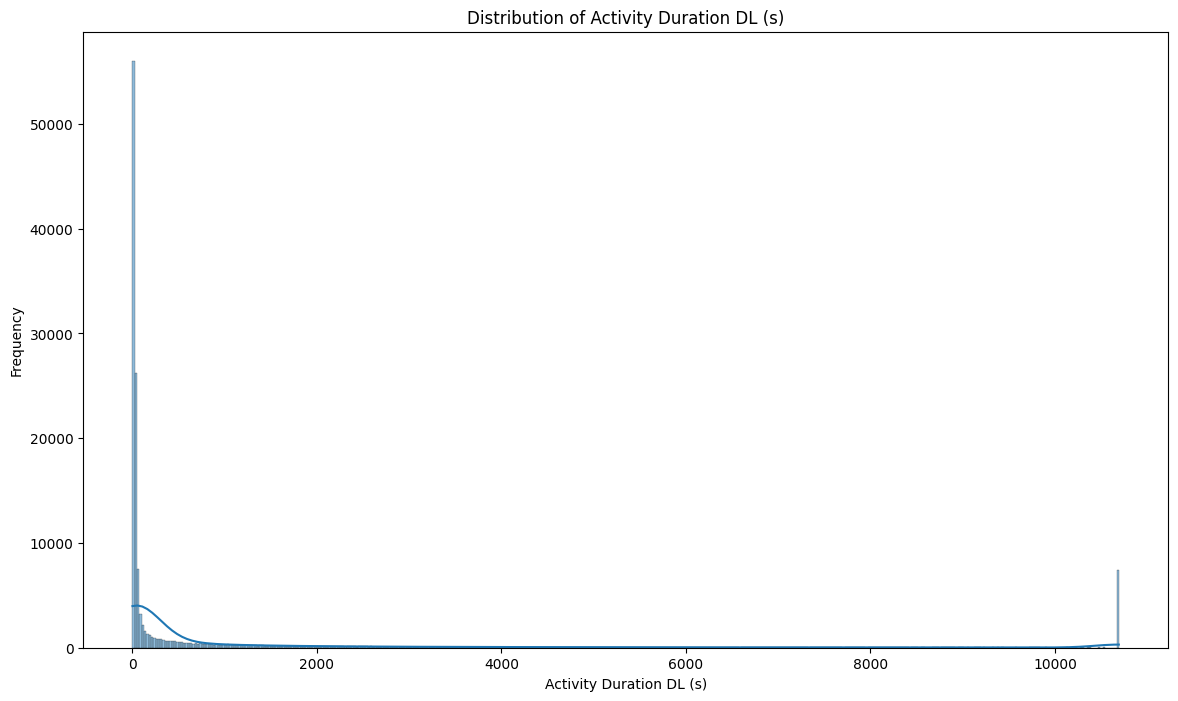

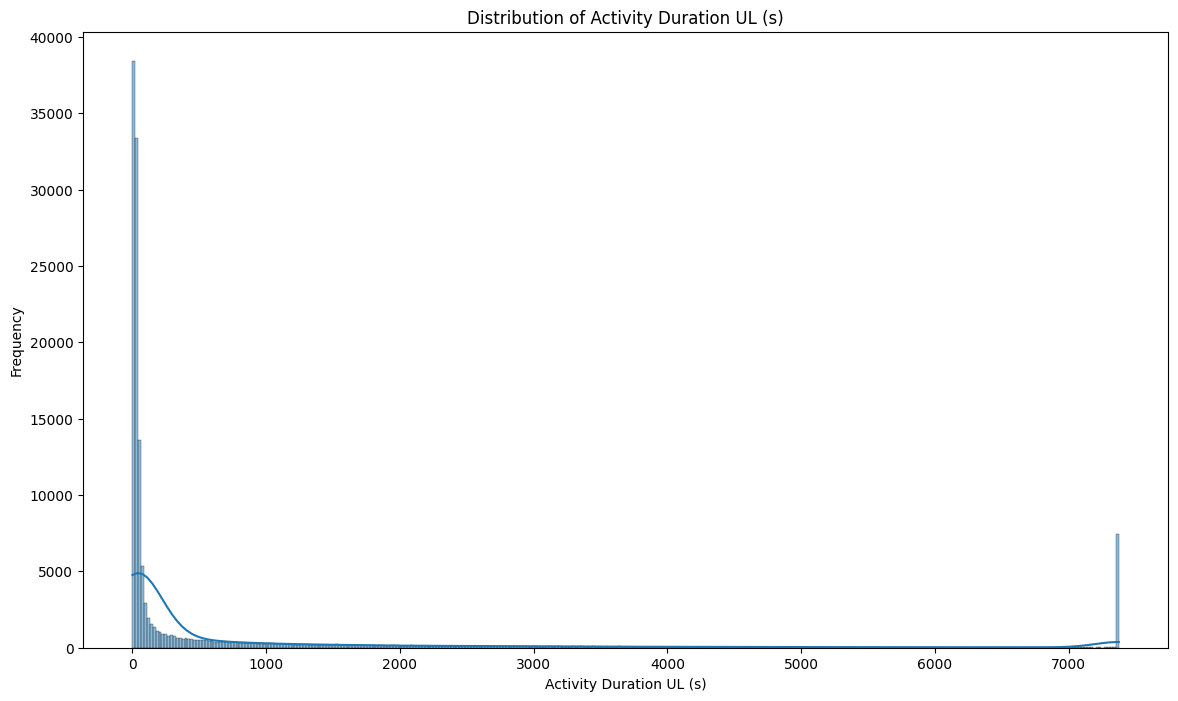

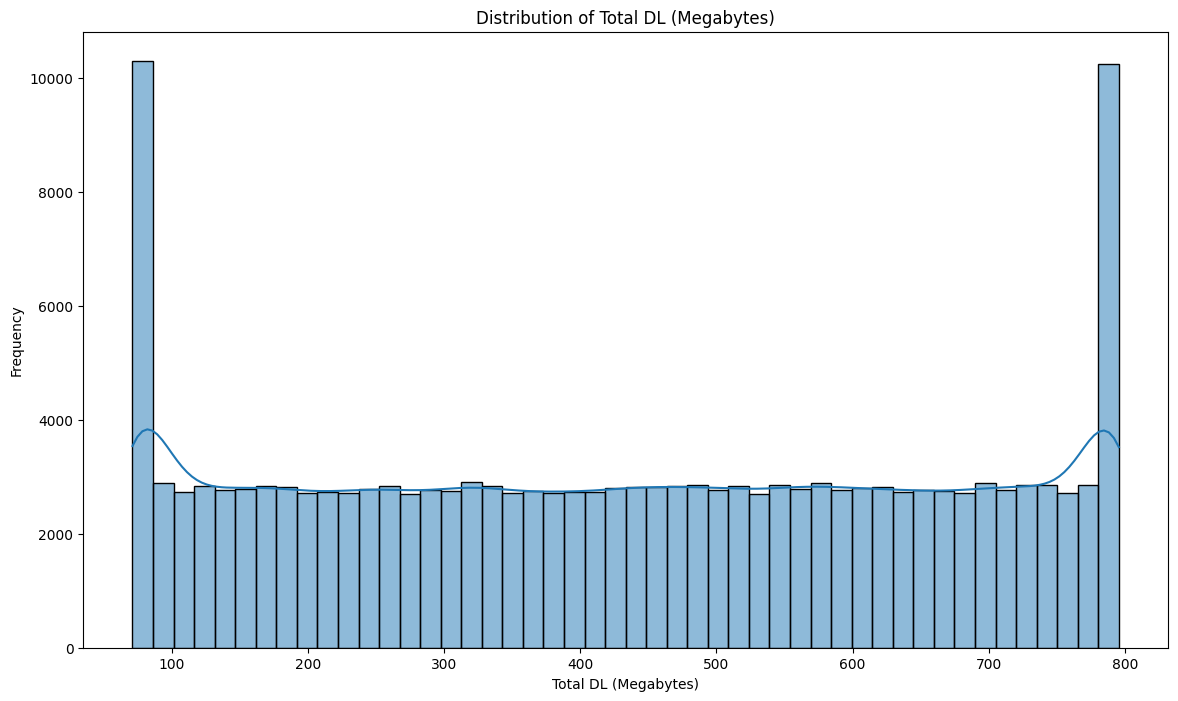

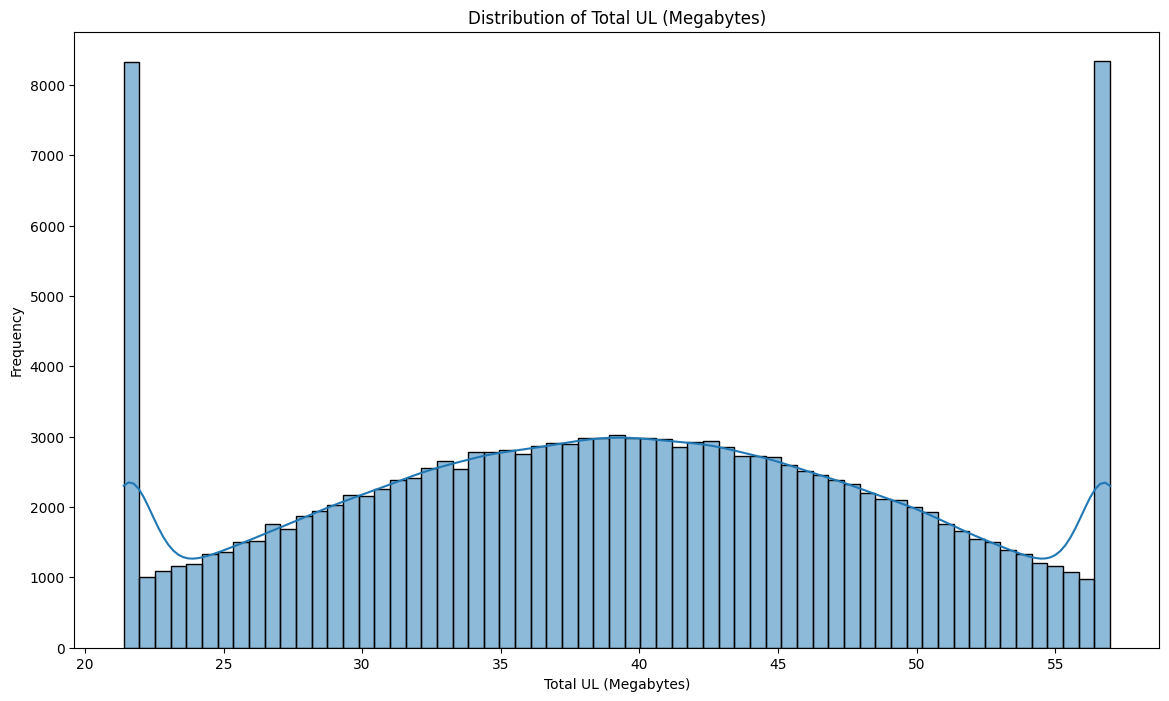

In [38]:
for column in ['Activity Duration DL (s)', 'Activity Duration UL (s)', 'Total DL (Megabytes)', 'Total UL (Megabytes)']:
    plt.figure(figsize=(14, 8))
    sns.histplot(df_user_overview[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

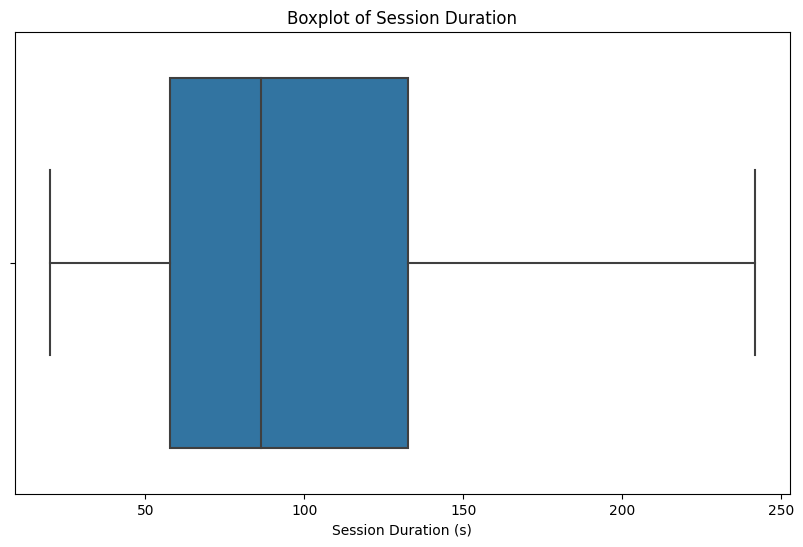

In [40]:
# Boxplot for session duration
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_user_overview['Dur. (s)'])
plt.title('Boxplot of Session Duration')
plt.xlabel('Session Duration (s)')
plt.show()

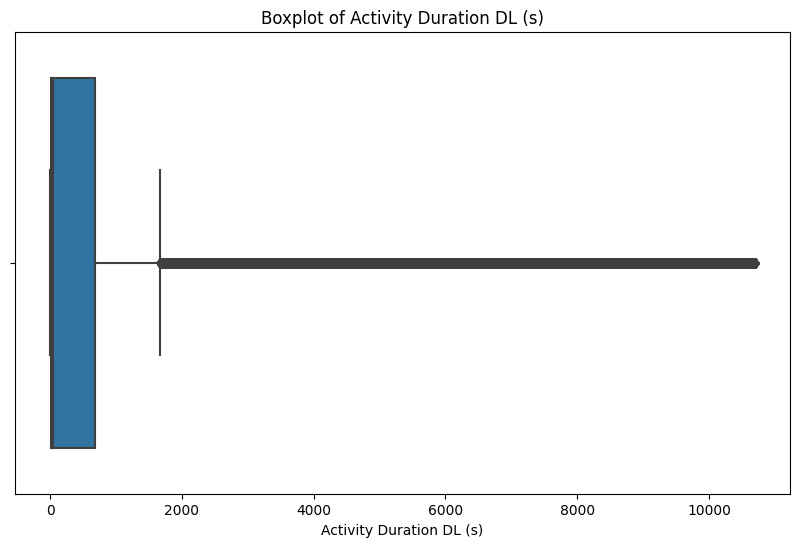

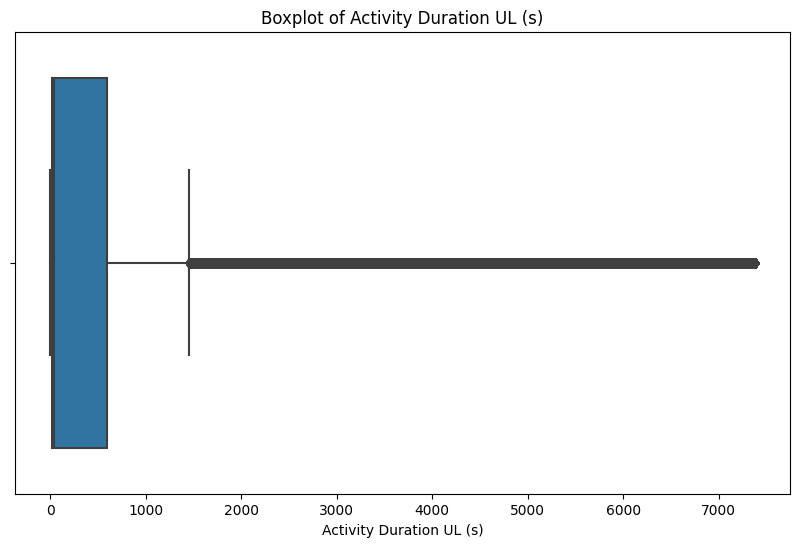

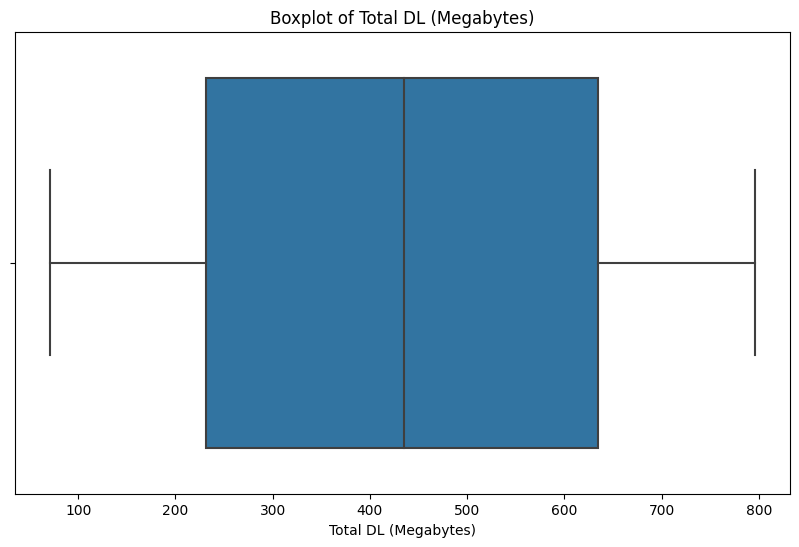

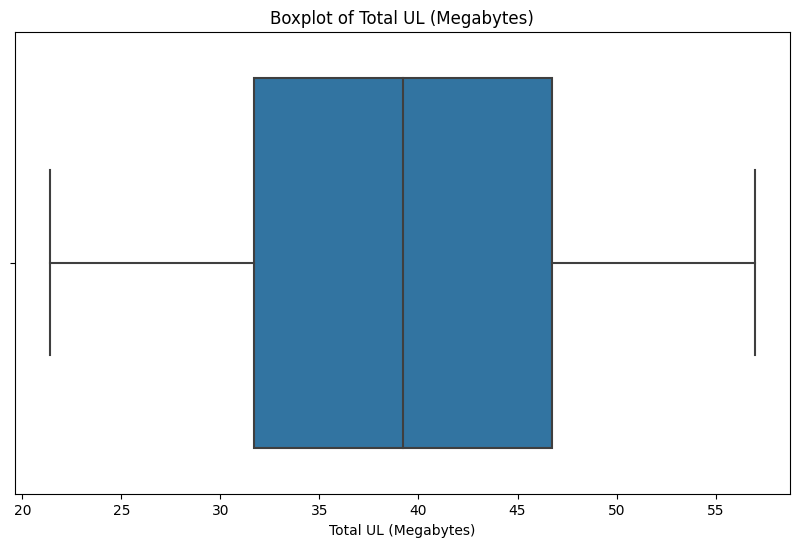

In [42]:
for column in ['Activity Duration DL (s)', 'Activity Duration UL (s)', 'Total DL (Megabytes)', 'Total UL (Megabytes)']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_user_overview[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

## The Analysis part

### Top 10 handsets used by the customers

In [44]:
top_10_handsets = df_user_overview['Handset Type'].value_counts().head(10)
print(top_10_handsets)

Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
undefined                        8931
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Name: Handset Type, dtype: int64


### Top 3 handset manufacturers

In [48]:
top_3_handset_manufacturers = df_user_overview['Handset Manufacturer'].value_counts().head(3)
print(top_3_handset_manufacturers)

Apple      59464
Samsung    40579
Huawei     34366
Name: Handset Manufacturer, dtype: int64


### Top 5 handsets per top 3 handset manufacturer

In [50]:
# Identify the top 3 handset manufacturers
top_3_manufacturers = df_user_overview['Handset Manufacturer'].value_counts().head(3).index

# Finding the top 5 handsets for each of the top 3 manufacturers
top_5_handsets_per_manufacturer = {}

for manufacturer in top_3_manufacturers:
    # Filtering the DataFrame for the current manufacturer
    manufacturer_data = df_user_overview[df_user_overview['Handset Manufacturer'] == manufacturer]
    
    # Identifying the top 5 handsets for the current manufacturer
    top_5_handsets = manufacturer_data['Handset Type'].value_counts().head(5)
    
    # Storing the results in a dictionary
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets

# Displaying the results
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\nTop 5 handsets for {manufacturer}:")
    print(handsets)



Top 5 handsets for Apple:
Apple iPhone 6S (A1688)    9413
Apple iPhone 6 (A1586)     9012
Apple iPhone 7 (A1778)     6304
Apple iPhone Se (A1723)    5176
Apple iPhone 8 (A1905)     4985
Name: Handset Type, dtype: int64

Top 5 handsets for Samsung:
Samsung Galaxy S8 (Sm-G950F)    4480
Samsung Galaxy A5 Sm-A520F      3708
Samsung Galaxy J5 (Sm-J530)     3682
Samsung Galaxy J3 (Sm-J330)     3464
Samsung Galaxy S7 (Sm-G930X)    3176
Name: Handset Type, dtype: int64

Top 5 handsets for Huawei:
Huawei B528S-23A                  19727
Huawei E5180                       2074
Huawei P20 Lite Huawei Nova 3E     2018
Huawei P20                         1479
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64


# Overview of the users’ behavior on applications

In [56]:
df_user_overview.columns

Index(['IMSI', 'MSISDN/Number', 'IMEI', 'Handset Manufacturer', 'Handset Type',
       'Dur. (s)', 'Start', 'End', 'Activity Duration DL (s)',
       'Activity Duration UL (s)', 'Total DL (Megabytes)',
       'Total UL (Megabytes)', 'Social Media DL (Megabytes)',
       'Social Media UL (Megabytes)', 'Youtube DL (Megabytes)',
       'Youtube UL (Megabytes)', 'Netflix DL (Megabytes)',
       'Netflix UL (Megabytes)', 'Google DL (Megabytes)',
       'Google UL (Megabytes)', 'Email DL (Megabytes)', 'Email UL (Megabytes)',
       'Gaming DL (Megabytes)', 'Gaming UL (Megabytes)',
       'Other DL (Megabytes)', 'Other UL (Megabytes)', 'Avg RTT DL (s)',
       'Avg RTT UL (s)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'],
      dtype='object')

In [73]:
application_columns = [
    'Social Media DL (Megabytes)', 'Social Media UL (Megabytes)',
    'Youtube DL (Megabytes)', 'Youtube UL (Megabytes)',
    'Netflix DL (Megabytes)', 'Netflix UL (Megabytes)',
    'Google DL (Megabytes)', 'Google UL (Megabytes)',
    'Email DL (Megabytes)', 'Email UL (Megabytes)',
    'Gaming DL (Megabytes)', 'Gaming UL (Megabytes)',
    'Other DL (Megabytes)', 'Other UL (Megabytes)'
]

In [76]:
user_aggregated_data = df_user_overview.groupby(user_id_column).agg({
    'Dur. (s)': 'sum',  # Total session duration per user
    'IMSI': 'count',  # Number of xDR sessions per user
    'Total DL (Megabytes)': 'sum',  # Total download data per user
    'Total UL (Megabytes)': 'sum',  # Total upload data per user
    **{col: 'sum' for col in application_columns}  # Total data volume for each application
}).rename(columns={'IMSI': 'Number of xDR Sessions'})

In [80]:
for app in ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']:
    user_aggregated_data[f'{app} Total Data (Megabytes)'] = user_aggregated_data[f'{app} DL (Megabytes)'] + user_aggregated_data[f'{app} UL (Megabytes)']


# Step 3: Display the aggregated data
user_aggregated_data.head()

,Dur. (s),Number of xDR Sessions,Total DL (Megabytes),Total UL (Megabytes),Social Media DL (Megabytes),Social Media UL (Megabytes),Youtube DL (Megabytes),Youtube UL (Megabytes),Netflix DL (Megabytes),Netflix UL (Megabytes),...,Gaming UL (Megabytes),Other DL (Megabytes),Other UL (Megabytes),Social Media Total Data (Megabytes),Youtube Total Data (Megabytes),Netflix Total Data (Megabytes),Google Total Data (Megabytes),Email Total Data (Megabytes),Gaming Total Data (Megabytes),Other Total Data (Megabytes)
IMSI,,,,,,,,,,,,,,,,,,,,,
2.040471e+14,241.7635,1,75.051877,56.972107,1.430650,0.043815,18980320.0,20898212.2,20.619713,6.890196,...,14.284113,371.131630,11.635530,1.474464,39878532.2,27.509909,8.791587,3.176664,54.384163,382.767159
2.040808e+14,241.7635,1,185.802513,35.568156,0.637623,0.044468,9839889.0,2120016.0,9.861858,15.498535,...,12.860425,446.012592,2.716420,0.682091,11959905.0,25.360394,9.955082,1.450320,169.800508,448.729012
2.082001e+14,86.0190,1,71.099902,51.302584,2.931306,0.046810,5556563.0,14325876.0,14.596330,15.759660,...,5.115110,476.879622,14.990004,2.978116,19882439.0,30.355989,1.549398,3.488065,45.215160,491.869626
2.082001e+14,86.2540,1,374.716104,32.027504,2.424972,0.032746,22076979.5,3242918.0,9.599341,16.899312,...,0.794487,286.963323,8.304489,2.457718,25319897.5,26.498653,13.171652,3.677114,328.807433,295.267812
2.082001e+14,425.0495,2,917.212508,68.020824,3.172694,0.093214,4046597.0,9793604.0,29.301925,25.362936,...,7.041402,1006.954993,22.474842,3.265908,13840201.0,54.664861,11.125457,5.306684,875.172392,1029.429835


In [85]:
user_aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 106855 entries, 204047108489451.0 to 208252167239575.0
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Dur. (s)                             106855 non-null  float64
 1   Number of xDR Sessions               106855 non-null  int64  
 2   Total DL (Megabytes)                 106855 non-null  float64
 3   Total UL (Megabytes)                 106855 non-null  float64
 4   Social Media DL (Megabytes)          106855 non-null  float64
 5   Social Media UL (Megabytes)          106855 non-null  float64
 6   Youtube DL (Megabytes)               106855 non-null  float64
 7   Youtube UL (Megabytes)               106855 non-null  float64
 8   Netflix DL (Megabytes)               106855 non-null  float64
 9   Netflix UL (Megabytes)               106855 non-null  float64
 10  Google DL (Megabytes)                106855 non-nul

In [86]:
user_aggregated_data.isnull().sum()

Dur. (s)                               0
Number of xDR Sessions                 0
Total DL (Megabytes)                   0
Total UL (Megabytes)                   0
Social Media DL (Megabytes)            0
Social Media UL (Megabytes)            0
Youtube DL (Megabytes)                 0
Youtube UL (Megabytes)                 0
Netflix DL (Megabytes)                 0
Netflix UL (Megabytes)                 0
Google DL (Megabytes)                  0
Google UL (Megabytes)                  0
Email DL (Megabytes)                   0
Email UL (Megabytes)                   0
Gaming DL (Megabytes)                  0
Gaming UL (Megabytes)                  0
Other DL (Megabytes)                   0
Other UL (Megabytes)                   0
Social Media Total Data (Megabytes)    0
Youtube Total Data (Megabytes)         0
Netflix Total Data (Megabytes)         0
Google Total Data (Megabytes)          0
Email Total Data (Megabytes)           0
Gaming Total Data (Megabytes)          0
Other Total Data

In [81]:
user_aggregated_data.describe()

,Dur. (s),Number of xDR Sessions,Total DL (Megabytes),Total UL (Megabytes),Social Media DL (Megabytes),Social Media UL (Megabytes),Youtube DL (Megabytes),Youtube UL (Megabytes),Netflix DL (Megabytes),Netflix UL (Megabytes),...,Gaming UL (Megabytes),Other DL (Megabytes),Other UL (Megabytes),Social Media Total Data (Megabytes),Youtube Total Data (Megabytes),Netflix Total Data (Megabytes),Google Total Data (Megabytes),Email Total Data (Megabytes),Gaming Total Data (Megabytes),Other Total Data (Megabytes)
count,106855.000000,106855.000000,106855.000000,106855.000000,106855.000000,106855.000000,1.068550e+05,1.068550e+05,106855.000000,106855.000000,...,106855.000000,106855.000000,106855.000000,106855.000000,1.068550e+05,106855.000000,106855.000000,106855.000000,106855.000000,106855.000000
mean,139.242010,1.393805,604.308357,54.651437,2.385984,0.043762,1.621436e+07,1.534350e+07,15.454794,14.621613,...,11.018382,559.800737,10.983451,2.429746,3.155786e+07,30.076407,10.378415,3.002854,572.007761,570.784188
std,129.623483,0.806026,440.525244,33.669225,1.789690,0.032914,1.224800e+07,1.153014e+07,11.675805,11.007969,...,8.277912,420.749874,8.255030,1.809307,2.121299e+07,20.226785,7.164580,2.109879,425.936393,425.683438
min,19.980700,1.000000,71.099902,21.400578,0.170490,0.003171,1.177169e+06,1.091884e+06,1.101614,1.049530,...,0.794487,39.816477,0.779687,0.173661,2.269053e+06,2.151145,0.746798,0.213337,40.894537,40.596164
25%,71.361000,1.000000,300.777432,34.717386,1.124111,0.020641,7.663352e+06,7.262180e+06,7.257327,6.883373,...,5.206561,264.535541,5.219024,1.157663,1.870154e+07,17.788836,5.672192,1.599452,275.354978,273.014269
50%,102.780000,1.000000,544.520040,44.684653,2.163204,0.039683,1.462181e+07,1.388613e+07,13.975826,13.250582,...,9.976300,506.090937,9.905849,2.199925,2.676628e+07,25.430188,9.152879,2.672671,518.040706,515.470057
75%,172.799000,2.000000,770.491939,60.730273,3.118342,0.057188,2.114833e+07,1.999419e+07,20.170095,19.095370,...,14.396283,730.537344,14.341630,3.156646,3.786197e+07,36.124913,12.562823,3.652614,741.843059,740.162814
max,4084.884000,18.000000,7716.212252,691.216809,40.728115,0.604719,2.369375e+08,2.139116e+08,191.140916,193.826554,...,146.281996,7652.830849,145.845869,41.332835,4.508490e+08,381.011085,144.661351,40.437489,7343.483977,7788.774425


## Visualizations

### Distribution of Session Durations

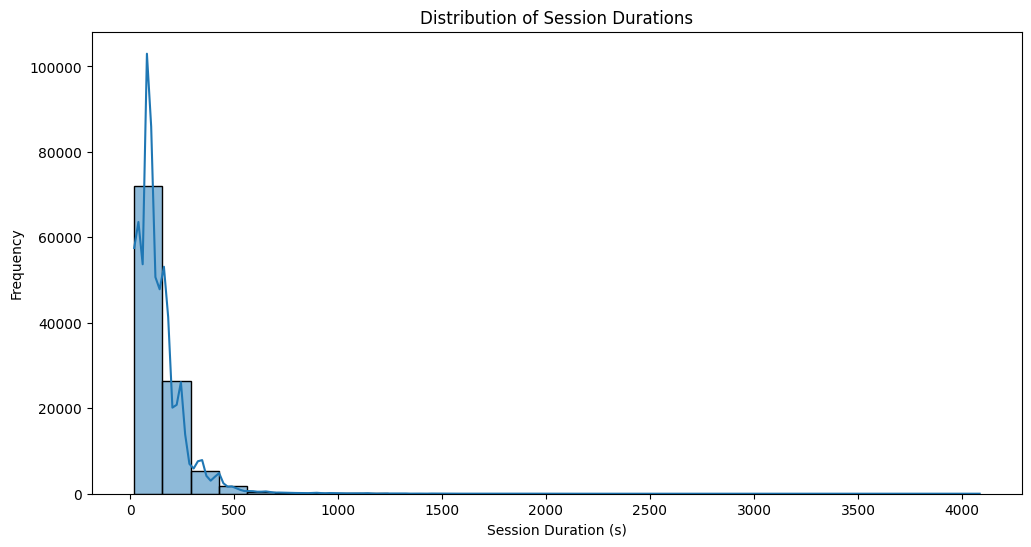

In [87]:
# 1. Distribution of Session Durations
plt.figure(figsize=(12, 6))
sns.histplot(user_aggregated_data['Dur. (s)'], bins=30, kde=True)
plt.title('Distribution of Session Durations')
plt.xlabel('Session Duration (s)')
plt.ylabel('Frequency')
plt.show()

### Distribution of Total Data Download/Upload

Text(0, 0.5, 'Frequency')

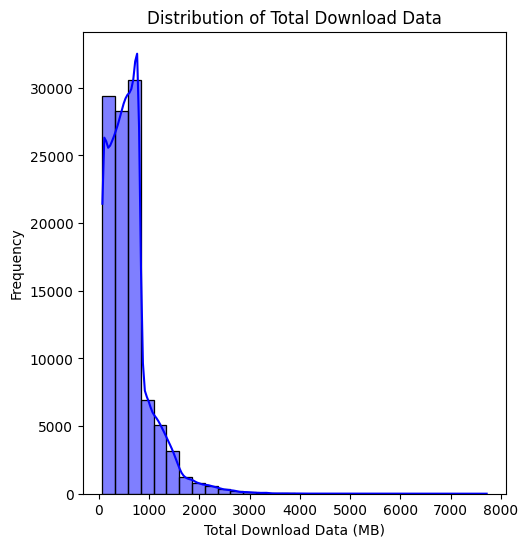

In [88]:
plt.figure(figsize=(12, 6))

# Plot Total Download Data
plt.subplot(1, 2, 1)
sns.histplot(user_aggregated_data['Total DL (Megabytes)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Download Data')
plt.xlabel('Total Download Data (MB)')
plt.ylabel('Frequency')

### Total Upload Data

Text(0, 0.5, 'Frequency')

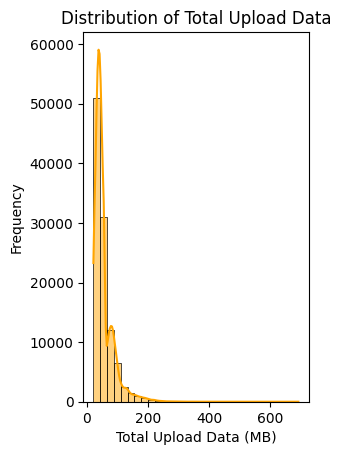

In [89]:
plt.subplot(1, 2, 2)
sns.histplot(user_aggregated_data['Total UL (Megabytes)'], bins=30, kde=True, color='orange')
plt.title('Distribution of Total Upload Data')
plt.xlabel('Total Upload Data (MB)')
plt.ylabel('Frequency')


### Top Applications by Total Data Usage

### Heatmap of Total Data Volume by Application

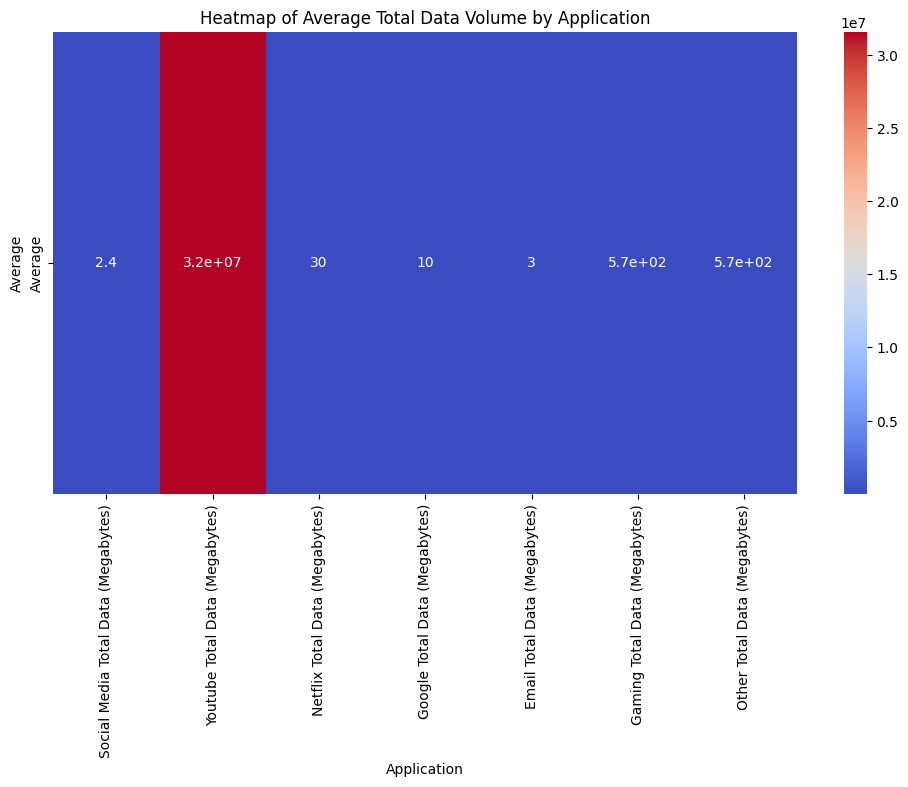

In [91]:
# Prepare data for heatmap
heatmap_data = user_aggregated_data.filter(like='Total Data (Megabytes)').mean()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.values.reshape(1, -1), annot=True, cmap='coolwarm', xticklabels=heatmap_data.index, yticklabels=['Average'])
plt.title('Heatmap of Average Total Data Volume by Application')
plt.xlabel('Application')
plt.ylabel('Average')
plt.show()